In [2]:
import kagglehub
from kagglehub import KaggleDatasetAdapter

# Set the path to the file you'd like to load
file_path = "GlobalWeatherRepository.csv"

# Load the latest version
df = kagglehub.load_dataset(
  KaggleDatasetAdapter.PANDAS,
  "nelgiriyewithana/global-weather-repository",
  file_path
  # Provide any additional arguments like 
  # sql_query or pandas_kwargs. See the 
  # documenation for more information:
  # https://github.com/Kaggle/kagglehub/blob/main/README.md#kaggledatasetadapterpandas
)

# print("First 5 records:", df.head())
df.head()

/tmp/ipykernel_18390/3366104257.py:8: DeprecationWarning: load_dataset is deprecated and will be removed in future version.
  df = kagglehub.load_dataset(


,country,location_name,latitude,longitude,timezone,last_updated_epoch,last_updated,temperature_celsius,temperature_fahrenheit,condition_text,...,air_quality_PM2.5,air_quality_PM10,air_quality_us-epa-index,air_quality_gb-defra-index,sunrise,sunset,moonrise,moonset,moon_phase,moon_illumination
0,Afghanistan,Kabul,34.52,69.18,Asia/Kabul,1715849100,2024-05-16 13:15,26.6,79.8,Partly Cloudy,...,8.4,26.6,1,1,04:50 AM,06:50 PM,12:12 PM,01:11 AM,Waxing Gibbous,55
1,Albania,Tirana,41.33,19.82,Europe/Tirane,1715849100,2024-05-16 10:45,19.0,66.2,Partly cloudy,...,1.1,2.0,1,1,05:21 AM,07:54 PM,12:58 PM,02:14 AM,Waxing Gibbous,55
2,Algeria,Algiers,36.76,3.05,Africa/Algiers,1715849100,2024-05-16 09:45,23.0,73.4,Sunny,...,10.4,18.4,1,1,05:40 AM,07:50 PM,01:15 PM,02:14 AM,Waxing Gibbous,55
3,Andorra,Andorra La Vella,42.50,1.52,Europe/Andorra,1715849100,2024-05-16 10:45,6.3,43.3,Light drizzle,...,0.7,0.9,1,1,06:31 AM,09:11 PM,02:12 PM,03:31 AM,Waxing Gibbous,55
4,Angola,Luanda,-8.84,13.23,Africa/Luanda,1715849100,2024-05-16 09:45,26.0,78.8,Partly cloudy,...,183.4,262.3,5,10,06:12 AM,05:55 PM,01:17 PM,12:38 AM,Waxing Gibbous,55


In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 58463 entries, 0 to 58462
Data columns (total 41 columns):
 #   Column                        Non-Null Count  Dtype  
---  ------                        --------------  -----  
 0   country                       58463 non-null  object 
 1   location_name                 58463 non-null  object 
 2   latitude                      58463 non-null  float64
 3   longitude                     58463 non-null  float64
 4   timezone                      58463 non-null  object 
 5   last_updated_epoch            58463 non-null  int64  
 6   last_updated                  58463 non-null  object 
 7   temperature_celsius           58463 non-null  float64
 8   temperature_fahrenheit        58463 non-null  float64
 9   condition_text                58463 non-null  object 
 10  wind_mph                      58463 non-null  float64
 11  wind_kph                      58463 non-null  float64
 12  wind_degree                   58463 non-null  int64  
 13  w

## Check for missing values

In [5]:
print(f"Check for missing values: \n {df.isna().any().sum(), df.isnull().any().sum()}")
df.info()

Check for missing values: 
 (0, 0)
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 58463 entries, 0 to 58462
Data columns (total 41 columns):
 #   Column                        Non-Null Count  Dtype  
---  ------                        --------------  -----  
 0   country                       58463 non-null  object 
 1   location_name                 58463 non-null  object 
 2   latitude                      58463 non-null  float64
 3   longitude                     58463 non-null  float64
 4   timezone                      58463 non-null  object 
 5   last_updated_epoch            58463 non-null  int64  
 6   last_updated                  58463 non-null  object 
 7   temperature_celsius           58463 non-null  float64
 8   temperature_fahrenheit        58463 non-null  float64
 9   condition_text                58463 non-null  object 
 10  wind_mph                      58463 non-null  float64
 11  wind_kph                      58463 non-null  float64
 12  wind_degree              

In [8]:
import pandas as pd
# Check for missing values
missing_values = df.isnull().sum()

# Drop unnecessary duplicate columns (e.g., temperature in both Celsius and Fahrenheit)
df_cleaned = df.drop(columns=["temperature_fahrenheit", "wind_mph", "pressure_in", "precip_in", 
                              "feels_like_fahrenheit", "visibility_miles", "gust_mph"])

# Convert date column to datetime format
df_cleaned["last_updated"] = pd.to_datetime(df_cleaned["last_updated"])

# Display missing values and first few rows after cleaning
missing_values, df_cleaned.head()


(country                         0
 location_name                   0
 latitude                        0
 longitude                       0
 timezone                        0
 last_updated_epoch              0
 last_updated                    0
 temperature_celsius             0
 temperature_fahrenheit          0
 condition_text                  0
 wind_mph                        0
 wind_kph                        0
 wind_degree                     0
 wind_direction                  0
 pressure_mb                     0
 pressure_in                     0
 precip_mm                       0
 precip_in                       0
 humidity                        0
 cloud                           0
 feels_like_celsius              0
 feels_like_fahrenheit           0
 visibility_km                   0
 visibility_miles                0
 uv_index                        0
 gust_mph                        0
 gust_kph                        0
 air_quality_Carbon_Monoxide     0
 air_quality_Ozone  

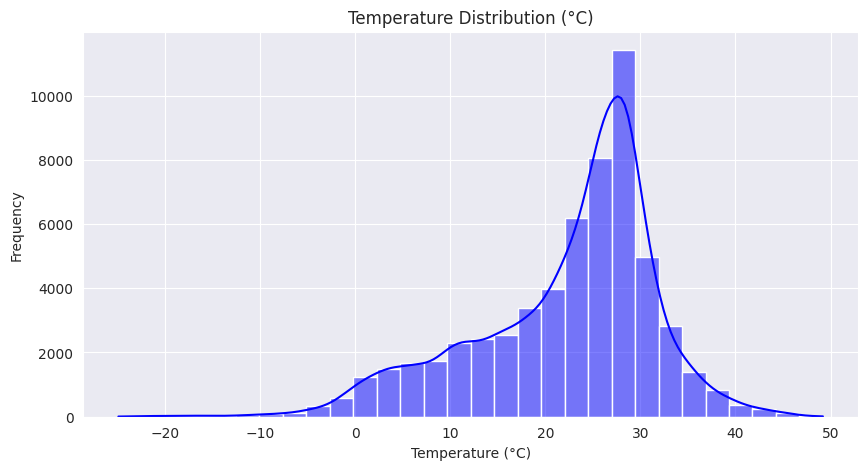

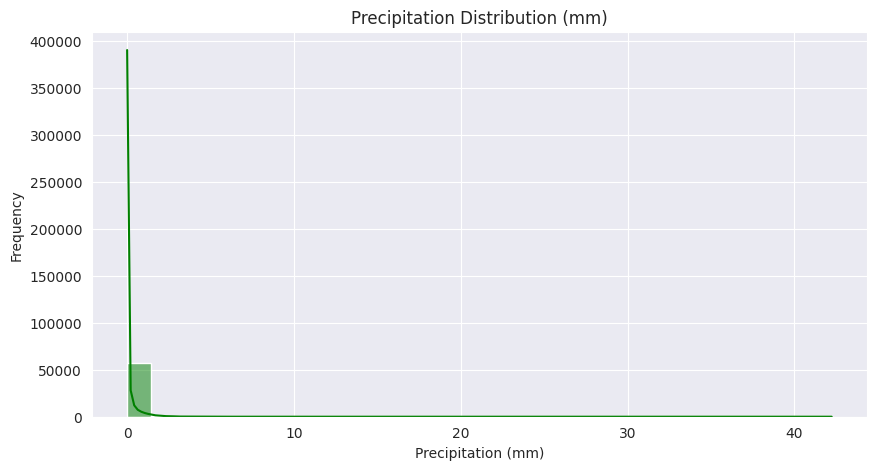

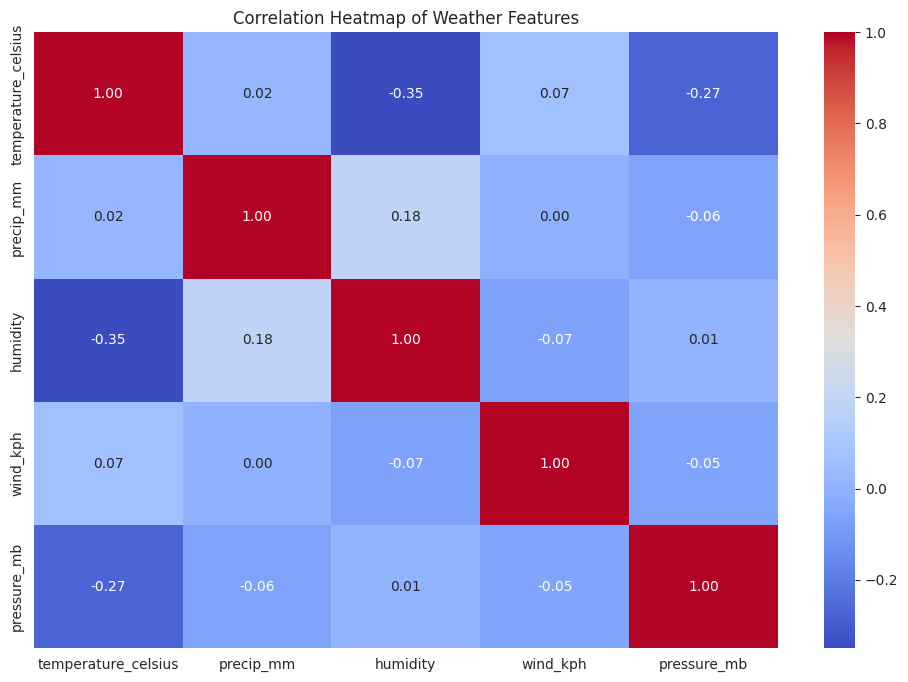

In [9]:
import matplotlib.pyplot as plt
import seaborn as sns

# Set style
sns.set_style("darkgrid")

# Plot temperature distribution
plt.figure(figsize=(10, 5))
sns.histplot(df_cleaned["temperature_celsius"], bins=30, kde=True, color="blue")
plt.title("Temperature Distribution (°C)")
plt.xlabel("Temperature (°C)")
plt.ylabel("Frequency")
plt.show()

# Plot precipitation distribution
plt.figure(figsize=(10, 5))
sns.histplot(df_cleaned["precip_mm"], bins=30, kde=True, color="green")
plt.title("Precipitation Distribution (mm)")
plt.xlabel("Precipitation (mm)")
plt.ylabel("Frequency")
plt.show()

# Correlation heatmap for key weather parameters
plt.figure(figsize=(12, 8))
correlation_matrix = df_cleaned[["temperature_celsius", "precip_mm", "humidity", "wind_kph", "pressure_mb"]].corr()
sns.heatmap(correlation_matrix, annot=True, cmap="coolwarm", fmt=".2f")
plt.title("Correlation Heatmap of Weather Features")
plt.show()


0                      Agriculture, value added (% of GDP)
1                   CO2 emissions (metric tons per capita)
2        Domestic credit provided by financial sector (...
3              Electric power consumption (kWh per capita)
4             Energy use (kg of oil equivalent per capita)
                               ...                        
36955                     Industry, value added (% of GDP)
36956                   Inflation, GDP deflator (annual %)
36957              Life expectancy at birth, total (years)
36958    Population density (people per sq. km of land ...
36959               Services, etc., value added (% of GDP)
Name: Indicator Name, Length: 36960, dtype: object

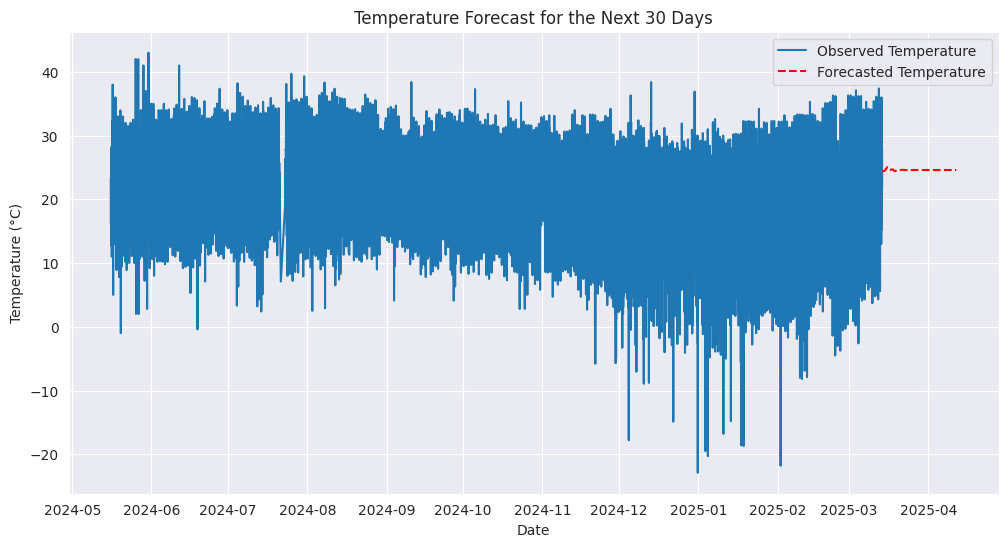

In [11]:
from statsmodels.tsa.arima.model import ARIMA
import numpy as np

# Prepare time series data (aggregating global temperature over time)
df_time_series = df_cleaned.groupby("last_updated")["temperature_celsius"].mean().reset_index()

# Sort by date
df_time_series = df_time_series.sort_values("last_updated")

# Train an ARIMA model for forecasting
model = ARIMA(df_time_series["temperature_celsius"], order=(5,1,0))  # ARIMA(5,1,0) chosen arbitrarily
model_fit = model.fit()

# Forecast next 30 days
forecast_steps = 30
forecast = model_fit.forecast(steps=forecast_steps)

# Generate future dates
future_dates = pd.date_range(start=df_time_series["last_updated"].max(), periods=forecast_steps, freq="D")

# Plot forecast
plt.figure(figsize=(12, 6))
plt.plot(df_time_series["last_updated"], df_time_series["temperature_celsius"], label="Observed Temperature")
plt.plot(future_dates, forecast, label="Forecasted Temperature", linestyle="dashed", color="red")
plt.xlabel("Date")
plt.ylabel("Temperature (°C)")
plt.title("Temperature Forecast for the Next 30 Days")
plt.legend()
plt.show()


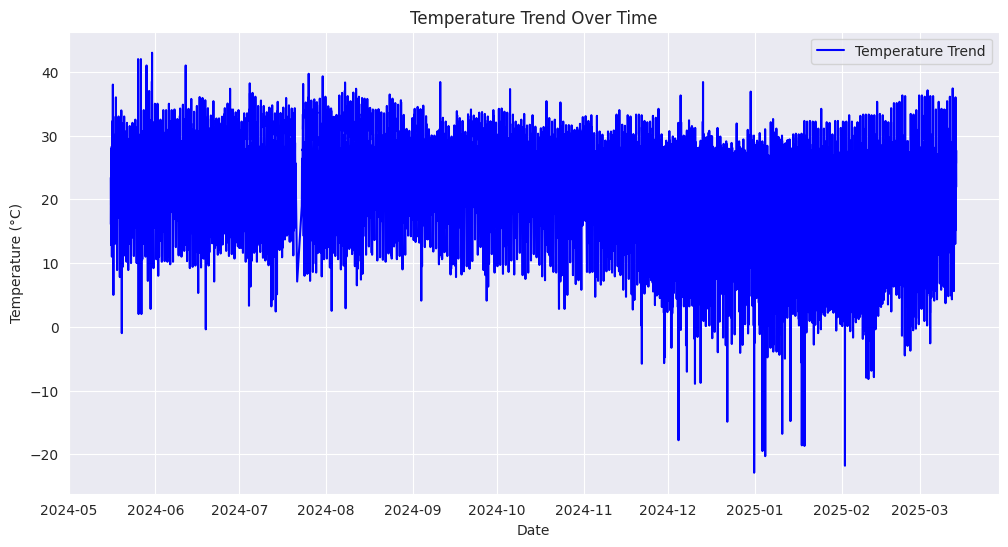

In [18]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from statsmodels.tsa.arima.model import ARIMA
from sklearn.metrics import mean_absolute_error, mean_squared_error

# Load the dataset
# df = pd.read_csv("GlobalWeatherRepository.csv")

# Convert last_updated to datetime format
df["last_updated"] = pd.to_datetime(df["last_updated"])

# Aggregate temperature data by date (mean temperature per day)
df_time_series = df.groupby("last_updated")["temperature_celsius"].mean().reset_index()

# Sort values by date
df_time_series = df_time_series.sort_values("last_updated")

# Plot temperature trend
plt.figure(figsize=(12, 6))
plt.plot(df_time_series["last_updated"], df_time_series["temperature_celsius"], label="Temperature Trend", color="blue")
plt.xlabel("Date")
plt.ylabel("Temperature (°C)")
plt.title("Temperature Trend Over Time")
plt.legend()
plt.show()


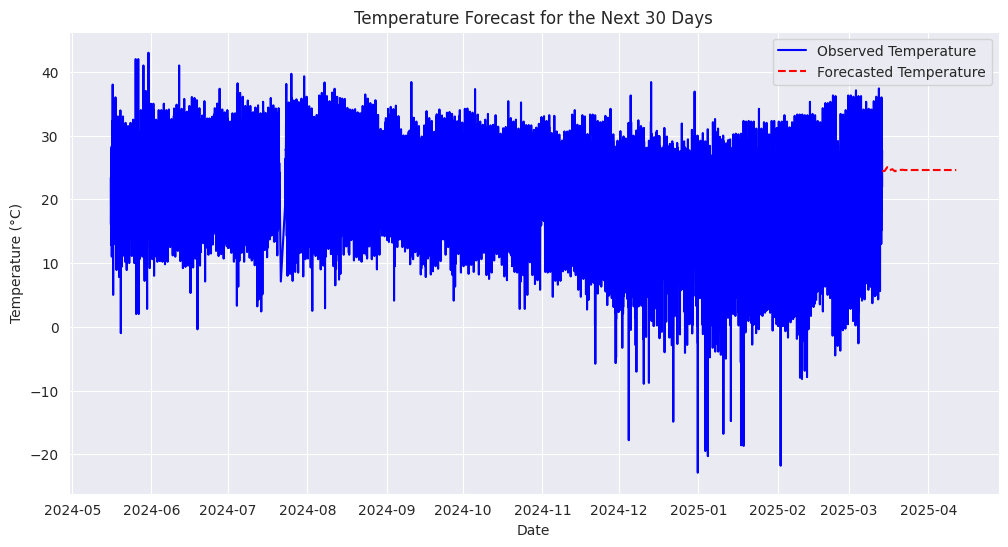

In [28]:
# Define and train ARIMA model
model = ARIMA(df_time_series["temperature_celsius"], order=(5,1,0))  # (p=5, d=1, q=0)
model_fit = model.fit()

# Forecast the next 30 days
forecast_steps = 30
forecast = model_fit.forecast(steps=forecast_steps)

# Generate future dates
future_dates = pd.date_range(start=df_time_series["last_updated"].max(), periods=forecast_steps, freq="D")

# Plot actual vs forecasted temperature
plt.figure(figsize=(12, 6))
plt.plot(df_time_series["last_updated"], df_time_series["temperature_celsius"], label="Observed Temperature", color="blue")
plt.plot(future_dates, forecast, label="Forecasted Temperature", linestyle="dashed", color="red")
plt.xlabel("Date")
plt.ylabel("Temperature (°C)")
plt.title("Temperature Forecast for the Next 30 Days")
plt.legend()
plt.show()


In [29]:
# Splitting the data into training and testing sets (80% train, 20% test)
train_size = int(len(df_time_series) * 0.8)
train, test = df_time_series[:train_size], df_time_series[train_size:]

# Train ARIMA on training data
model = ARIMA(train["temperature_celsius"], order=(5,1,0))
model_fit = model.fit()

# Predict on test data
test_forecast = model_fit.forecast(steps=len(test))

# Calculate evaluation metrics
mae = mean_absolute_error(test["temperature_celsius"], test_forecast)
rmse = np.sqrt(mean_squared_error(test["temperature_celsius"], test_forecast))

print(f"Model Performance:")
print(f"Mean Absolute Error (MAE): {mae:.2f}")
print(f"Root Mean Squared Error (RMSE): {rmse:.2f}")


Model Performance:
Mean Absolute Error (MAE): 6.67
Root Mean Squared Error (RMSE): 8.25


In [30]:
# Identify anomalies using Z-score method
from scipy.stats import zscore

# Compute Z-scores for temperature and precipitation
df_cleaned["temp_zscore"] = zscore(df_cleaned["temperature_celsius"])
df_cleaned["precip_zscore"] = zscore(df_cleaned["precip_mm"])

# Define anomalies as values with Z-score > 3 or < -3
anomalies = df_cleaned[(df_cleaned["temp_zscore"].abs() > 3) | (df_cleaned["precip_zscore"].abs() > 3)]

# Count anomalies and display
num_anomalies = anomalies.shape[0]
anomalies[["last_updated", "location_name", "temperature_celsius", "precip_mm"]]


,last_updated,location_name,temperature_celsius,precip_mm
176,2024-05-16 21:45:00,Nuku`Aloia,23.0,2.09
181,2024-05-16 20:45:00,Funafuti,26.0,2.00
219,2024-05-16 22:00:00,Bandar Seri Begawan,27.0,3.01
273,2024-05-16 21:00:00,Jakarta,29.0,2.05
317,2024-05-16 16:00:00,Amsterdam,20.0,2.42
...,...,...,...,...
58133,2025-03-12 21:30:00,Suva,25.1,8.30
58167,2025-03-12 16:45:00,Laos,27.6,2.16
58184,2025-03-12 13:45:00,Port Louis,30.3,2.06
58302,2025-03-13 05:45:00,Ottawa,-6.7,0.00


In [31]:
from scipy.stats import zscore

# Compute Z-scores for temperature and precipitation
df_cleaned["temp_zscore"] = zscore(df_cleaned["temperature_celsius"])
df_cleaned["precip_zscore"] = zscore(df_cleaned["precip_mm"])

# Define anomalies as values with Z-score > 3 or < -3
anomalies = df_cleaned[(df_cleaned["temp_zscore"].abs() > 3) | (df_cleaned["precip_zscore"].abs() > 3)]

# Display anomalies
print(f"Number of anomalies detected: {len(anomalies)}")
print(anomalies[["last_updated", "location_name", "temperature_celsius", "precip_mm"]])


Number of anomalies detected: 1049
             last_updated        location_name  temperature_celsius  precip_mm
176   2024-05-16 21:45:00           Nuku`Aloia                 23.0       2.09
181   2024-05-16 20:45:00             Funafuti                 26.0       2.00
219   2024-05-16 22:00:00  Bandar Seri Begawan                 27.0       3.01
273   2024-05-16 21:00:00              Jakarta                 29.0       2.05
317   2024-05-16 16:00:00            Amsterdam                 20.0       2.42
...                   ...                  ...                  ...        ...
58133 2025-03-12 21:30:00                 Suva                 25.1       8.30
58167 2025-03-12 16:45:00                 Laos                 27.6       2.16
58184 2025-03-12 13:45:00           Port Louis                 30.3       2.06
58302 2025-03-13 05:45:00               Ottawa                 -6.7       0.00
58449 2025-03-13 21:45:00             Funafuti                 29.3       2.09

[1049 rows x 4 c

In [32]:
from statsmodels.tsa.statespace.sarimax import SARIMAX

sarima_model = SARIMAX(train["temperature_celsius"], order=(5,1,0), seasonal_order=(1,1,1,12))
sarima_fit = sarima_model.fit()
sarima_forecast = sarima_fit.forecast(steps=len(test))

# Evaluate SARIMA
mae_sarima = mean_absolute_error(test["temperature_celsius"], sarima_forecast)
rmse_sarima = np.sqrt(mean_squared_error(test["temperature_celsius"], sarima_forecast))
print(f"SARIMA Performance: MAE = {mae_sarima:.2f}, RMSE = {rmse_sarima:.2f}")


RUNNING THE L-BFGS-B CODE

           * * *

Machine precision = 2.220D-16
 N =            8     M =           10

At X0         0 variables are exactly at the bounds

At iterate    0    f=  3.46394D+00    |proj g|=  8.26499D-02


 This problem is unconstrained.



At iterate    5    f=  3.32867D+00    |proj g|=  2.72308D-02

At iterate   10    f=  3.31092D+00    |proj g|=  3.31612D-03

At iterate   15    f=  3.30812D+00    |proj g|=  1.47571D-02

At iterate   20    f=  3.30723D+00    |proj g|=  1.87451D-03

At iterate   25    f=  3.30723D+00    |proj g|=  4.47338D-04

           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * * *

   N    Tit     Tnf  Tnint  Skip  Nact     Projg        F
    8     28     33      1     0     0   5.900D-06   3.307D+00
  F =   3.3072264197795591     

CONVERGENCE: NORM_OF_PROJECTED_GRADIENT_<=_PGTOL            
SARIMA Performance: MAE = 6.98, RMSE = 8.51


In [37]:
from sklearn.ensemble import RandomForestRegressor

# Convert categorical features to numerical (if any)
df_cleaned = pd.get_dummies(df_cleaned, drop_first=True)
df_cleaned = df_cleaned.fillna(df_cleaned.mean())


# Define features and target
features = df_cleaned.drop(columns=["temperature_celsius", "last_updated"])
target = df_cleaned["temperature_celsius"]

# Train model
rf_model = RandomForestRegressor(n_estimators=100, random_state=42)
rf_model.fit(features, target)

# Feature importance
importances = pd.Series(rf_model.feature_importances_, index=features.columns)

# Display sorted feature importance
print(importances.sort_values(ascending=False))



KeyboardInterrupt: 